In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

## Data Preparation 

In [22]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


In [23]:
plt.style.use('seaborn')

## Data visualise

TypeError: 'str' object is not callable

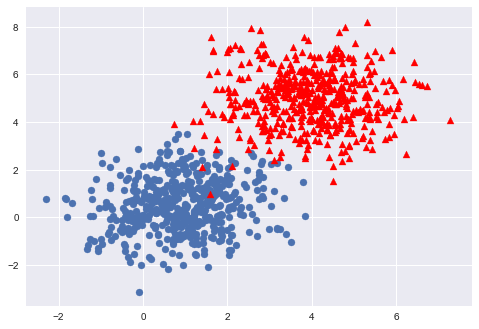

In [24]:
plt.scatter(dist_01[:,0],dist_01[:,1], label ='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color = 'red',label = 'class 1', marker = '^')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.legend()
plt.show()

In [25]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [26]:
data[:500,:2]= dist_01
data[500:,:2]= dist_02
data[:500,2]=1.0


In [27]:
np.random.shuffle(data)
split = int(0.8*data.shape[0])

In [28]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [29]:
def hypothesis(x,w,b):
    return sigmoid(np.dot(x,w)+b)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i]-hx)*x[i]
        grad_b += (y_true[i]-hx)
        
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]
#one iteration of gradient descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b

def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    y_pred =[]
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
    y_pred= np.array(y_pred)
    
    return float((y_pred==y_tst).sum())/y_tst.shape[0]

In [30]:
loss = []
acc = []
W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [31]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

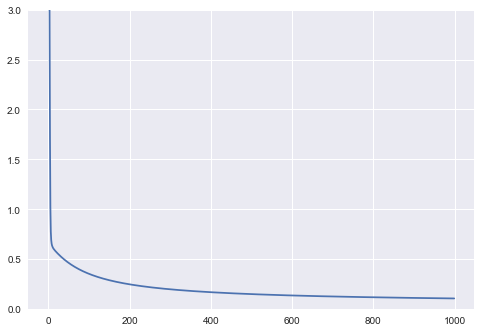

In [34]:
plt.plot(loss)
plt.xlabel=("negative of log likelihood")
plt.ylabel=("time")

plt.ylim(0,3)
plt.show()

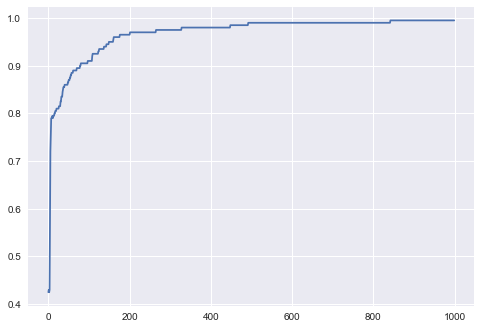

In [35]:
plt.plot(acc)

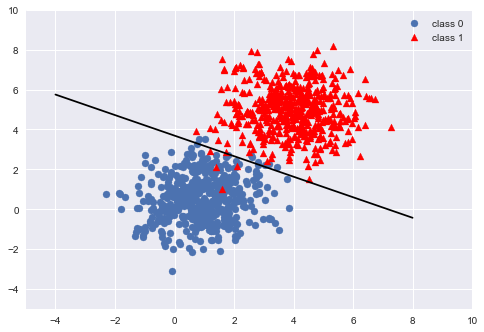

In [43]:
plt.scatter(dist_01[:,0],dist_01[:,1], label ='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color = 'red',label = 'class 1', marker = '^')

plt.xlim(-5,10)
plt.ylim(-5,10)

x = np.linspace(-4,8,10)
y = -(W[0]*x +b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [44]:
print(W)
print(b)

[-0.67560729 -1.31125153]
4.8365551723044895
